# Neural network classifier

In [1]:
%matplotlib inline

## Load data

In [2]:
from imbatcher.Decoder import Decoder


paths = ["/home/yordwynn/Image/screenshots/true/",
         "/home/yordwynn/Image/screenshots/false/"]
labels = [1, 0]
data = Decoder.decode_png_images(paths, labels, 0.4)
x_data = data["data"]
y_data = data["labels"]

## Show data

Print 5 positive and 5 negative random images

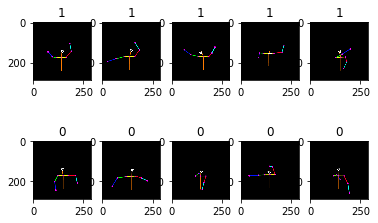

In [3]:
import numpy as np
import matplotlib.pyplot as plt

samples_per_class = 5
num_classes = len(labels)

y_data = np.array(y_data).reshape(-1)
x_data = np.array(x_data)

for y, item in enumerate(labels):
    idxs = np.flatnonzero(y_data == item)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        image = x_data[idxs[i]]
        image = image.reshape(288, 288, 3)
        label = y_data[idxs[i]]
        plt.subplot(num_classes, samples_per_class, i + 1 + y * samples_per_class)
        plt.imshow(image)
        plt.title(label)
        
plt.show()

## Tune neural network classifier

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit

activation = ["logistic", "relu"]
activation_count = len(activation)

solver = ["adam", "lbfgs"] #его не буду тюнить через поиск гиперпараметров
solver_count = len(solver)

alpha = np.arange(0.0001,1,0.1)
alpha_count = len(alpha)

classifier = MLPClassifier(activation="logistic", solver="lbfgs")
param_grid = {"alpha": alpha}
scoring = {"accuracy": make_scorer(accuracy_score),
           "recall": make_scorer(recall_score)}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

gs = GridSearchCV(classifier, param_grid=param_grid, scoring=scoring,
                  cv=cv, refit='accuracy', return_train_score=True, iid=False)
gs.fit(x_data[257:357], y_data[257:357])

results = gs.cv_results_
best_params = gs.best_params_
best_score = gs.best_score_

print(best_params)
print(best_score)

NameError: name 'metric' is not defined